# Glacier advance and retreat

## Acknowledgment

from the OGGM edu notebooks collection

* added info on the initial jump from the getting started notebook

Goals of this notebook:

- Understand the concept of the equilibrium line altitude (ELA)
- Understand the relationship between the glacier mass balance and the ELA
- Be able to explain glacier advance and retreat in response to a change in the ELA

In [11]:
from oggm_edu import GlacierBed, Glacier, MassBalance
from oggm_edu.funcs import plot_glacier_graphics

## Exploring glacier advance and retreat with OGGM-Edu

We start by defining an idealised glacier, then we let the glacier grow until it reaches its equilibrium state. Then we can simulate glacier advance and retreat. We represent the different steps illustrated in the [open glacier graphics from the OGGM-EDU website](https://edu.oggm.org/en/latest/glacier_basics.html) (made by Anne Maussion, [Atelier les Gros yeux](http://atelierlesgrosyeux.com/)).

### Initialisation: Let's define our glacier

First, as always, we define a linear bedrock profile:

Often glaciers are wider in the accumulation area, so we construct our glacier such that it is wider above the ELA. 

In [12]:
# Lets define the bed.
# Top and bottom altitude.
top = 5000
bottom = 0
# How far does the accumulation area extend?
accumulation_fraction = 1 / 3
# ELA altitude
ela_alt = (top - bottom) * (1 - accumulation_fraction)
# Accumulation area starts out as 1000 m. wide.
top_width = 1000
# 500 m. wide after ELA.
ela_width = 500

# Bed, note that we increase the map_dx here,
# we increase the grid point spacing.
bed = GlacierBed(
    altitudes=[top, ela_alt, bottom],
    widths=[top_width, ela_width, ela_width],
    map_dx=200,
)

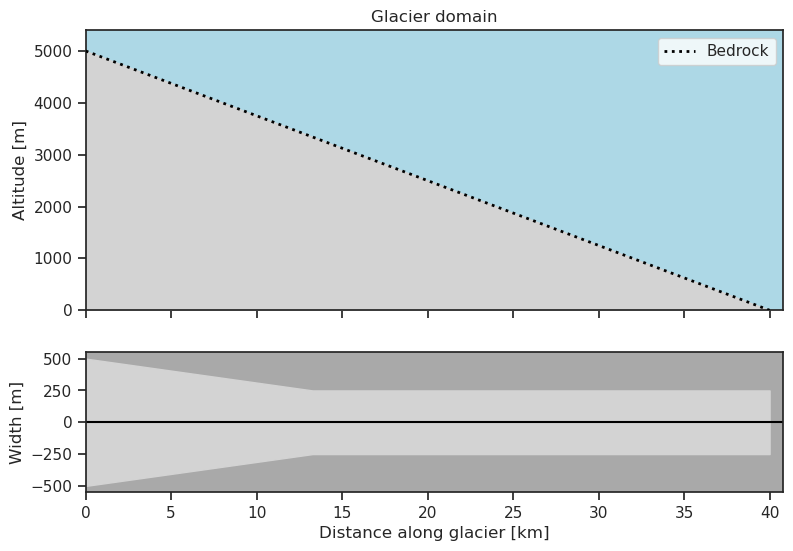

In [13]:
bed.plot()

Now we need to define the mass balance distribution over the glacier, after which the glacier can grow to its initial equilibrium state.

#### **Mass balance and the equilibrium line altitude**

The **mass balance** is the result of several processes that either add mass to the glacier (**accumulation**) or remove mass from the glacier (**ablation**). You can find more details in the [accumulation and ablation notebook](accumulation_and_ablation.ipynb). As a summary the following glacier graphics illustrate this relationship: 

- The left graphic represents a theoretical mass accumulation over the whole glacier depicted by the blue ice volume on top of the grey glacier body.
- In the middle graphic a theoretical mass ablation is marked as red ice volume.
- The  graphic on the right shows the resulting mass balance with blue and red arrows in combination with the blue and red volume changes on top of the grey glacier body. In the central part of the glacier where the red line lies directly on the grey glacier body ablation and accumulation canceled each other out.

<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_03.png" width="33%" align="left">
<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_04.png" width="33%" align="left">
<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_05.png" width="33%" align="left">

*Source: [open glacier graphics](http://edu.oggm.org/en/latest/glacier_basics.html) on OGGM-Edu, made by Anne Maussion ([Atelier les Gros yeux](http://atelierlesgrosyeux.com/))*.

The rates of accumulation and ablation processes, summed over the glacier and over time, determine the *glacier mass balance*: $\dot{m}$, the change in total mass of snow and ice,

$$\dot{m} = \text{accumulation} + \text{ablation}.$$

Since accumulation and ablation generally vary with height, the glacier mass balance is also a function of elevation,

$$\dot{m}(z) = \text{accumulation}(z) + \text{ablation}(z).$$

Mass is continuously redistributed in a glacier: accumulated mass at the top of the glacier is transported down-glacier. The driving force of this *ice flow* is gravity. Thus, the mass balance of a region on a glacier depends not only on the mass exchanges induced by accumulation and ablation, but also on the gravity driven transport of ice from the accumulation to the ablation area. The *ice flow* is indicated by the grey arrow in this figure:

<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_06.png" width="60%">

The altitude where $\dot{m}(z) = 0$ is called the *equilibrium line altitude*, short ELA. Hence, the ELA is the altitude where accumulation processes and ablation processes balance each other - in theory. However, in reality the ELA does not exactly exist and can only be approximated.

<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_07.png" width="60%">

**We want to reproduce these processes above in an experiment using OGGM-Edu**.

For this purpose we start with defining a linear mass balance which has the form

$$\dot{m}(z) = (z - ELA) \frac{d\dot{m}}{dz},$$

with the mass balance gradient $\frac{d\dot{m}}{dz}$:

In [14]:
# mass balance gradient with respect to elevation in mm w.e. m^-1 yr^-1
mb_grad = 7

Define the ELA to be as close as possible to the ELA width. With this we can define the mass balance model.

In [15]:
# Defining the mass balance, we use the altitude defined above.
mass_balance = MassBalance(ela=ela_alt, gradient=mb_grad)

Now that we have all the ingredients for a glacier we can initialise it.

In [16]:
my_glacier = Glacier(bed=bed, mass_balance=mass_balance)
my_glacier

,
Attribute,
Id,2
Type,Glacier
Age,0
Length [m],0.0
Area [km2],0.0
Volume [km3],0.0
Max ice thickness [m],0.0
Max ice velocity [m/yr],None
AAR [%],NaN


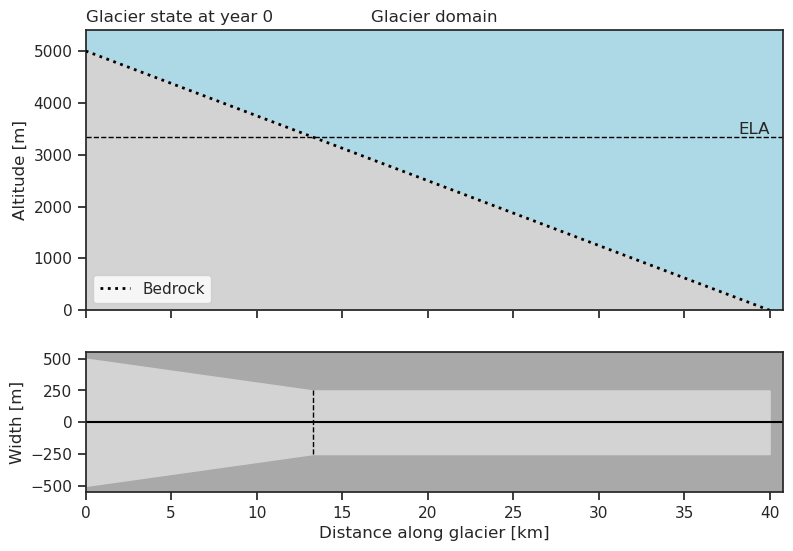

In [17]:
my_glacier.plot()

### Glacier in Equilibrium

For a glacier to be in equilibrium, we require the specific mass balance (accumulation + ablation) to be zero averaged over a year on the glacier. A glacier is in equilibrium if the glacier will neither retreat nor advance from one year to the next year if the climate stays constant.

Let's progress the glacier until it reaches equilibrium

In [18]:
my_glacier.progress_to_equilibrium()

Take a look at the current glacier state

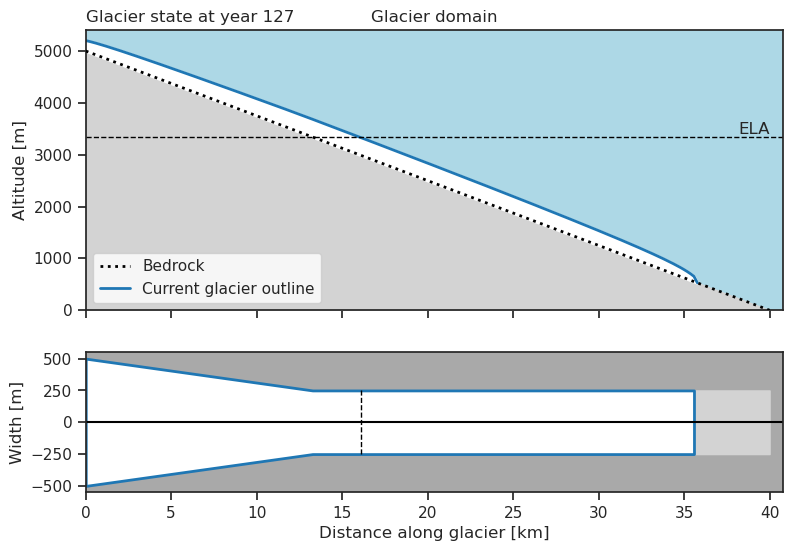

In [19]:
my_glacier.plot()

Although our initial glacier is in equilibrium, it doesn't mean that the mass balance is zero everywhere.
The net positive mass balance at the top (more accumulation, less ablation) balances out the net negative mass balance at the tongue (less accumulation, more ablation).

As explained in the [accumulation and ablation notebook](accumulation_and_ablation.ipynb), the net accumulation at the top results in a flow of ice trough the glacier which compensate for melt in the lower areas. 

**At equilibrium, a glacier's net mass-balance is zero but ice is still moving from top to bottom.**

Now we have set the scene to take a look at glacier advance and retreat.

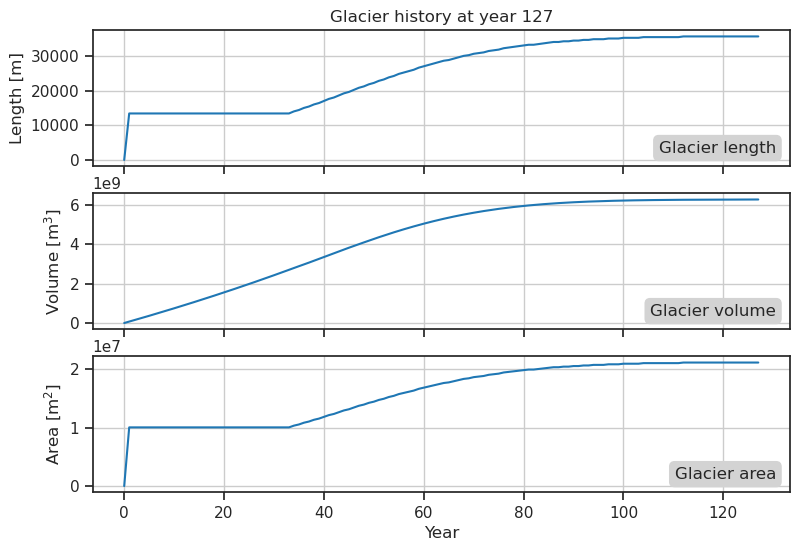

In [20]:
my_glacier.plot_history()

Note the 10^7 factor in the area and 10^9 in volumen.

The glacier length and area has a step in the first year. This has to do with how OGGM internally deals with snow and ice, it does not differentiate between them. And since the mass balance is always positive above the ELA, any snowfall in the first year above the ELA will remain and be classified as part of the glacier, and contribute to the length and area.

This is why after the first year, the glacier’s length and area remains constant for a few years. In this initial stage, the ice is so thin that any flow bringing ice below the ELA will not be large enough to compensate for the high ablation rate, and any ice melts away.

When the ice thickness has increased enough for the ice flow to surpass the ablation rate below the ELA, the glacier length can begin to increase.

## Advancing Glacier

To induce a glacier advance we will use the same glacier as before, but decrease the temperature.
This moves the ELA down the glacier.

To achieve this we set up a climate change scenario with the `.add_temperature_bias` method.
Our scenario implies a temperature decrease of -1.5$^\circ$C during 50 years.

In [ ]:
my_glacier.add_temperature_bias(bias=-1.5, duration=50)

 We then progress the glacier until it reaches equilibrium

In [ ]:
my_glacier.progress_to_equilibrium()

In [ ]:
my_glacier.mass_balance

As we can see in the representation above, the current ELA sits around 3108 m a.s.l. while the original ELA was at 3333 m a.s.l.

Let's take a look at the new equilibrium state after the we decreased the temperature

In [ ]:
my_glacier.plot_state_history(eq_states=True)

Decreasing the ELA results in an increased accumulation area and thus higher accumulation. More mass at the top of the glacier will increase the ice flow $\vec{q}$ down the glacier, leading to an advance of the glacier terminus and thus expanding the ablation area.
We can see this observing the outlines in the plot above.
The blue, older, outline extends further down the glacier compared to the orange, younger, outline.
This is also illustrated in the plot below.

In [ ]:
plot_glacier_graphics("09")

## Retreating glacier

Similarly, we can cause the glacier retreat.
We will set up our initial glacier again, but this time increase the temperature and thus move the ELA up the glacier.

For this we set up a another climate change scenario, but this time with a positive temperature change.

In [ ]:
mass_balance = MassBalance(ela=ela_alt, gradient=mb_grad)
my_glacier = Glacier(bed=bed, mass_balance=mass_balance)
my_glacier.progress_to_equilibrium()

In [ ]:
# Climate change scenario
# 3 degrees warmer in 100 years.
my_glacier.add_temperature_bias(bias=3.0, duration=100)

And let's progress until we reach a new equilibrium

In [ ]:
my_glacier.progress_to_equilibrium()

In [ ]:
my_glacier.mass_balance

 Here we ended up raising the ELA from 3333 m. a.s.l. to 3783 m. a.s.l.

Plot the new equilibrium state

In [ ]:
my_glacier.plot_state_history(eq_states=True)

Comparing the outlines of the two equilibrium states we can see that the glacier has retreated: The shorted orange outline is older compared to the blue outline.
Similar to what we see in the figure below.

In [ ]:
plot_glacier_graphics("10")

We can further explore the glacier response during retreat by looking at the history of our glacier.

In [ ]:
my_glacier.plot_history()

Raising the temperature will grow the ablation area which correspond to increasing the ELA.
This results in an increased mass loss, and a lower ice flux, for the glacier.
Since the accumulation is no longer able to keep up with the increased mass loss the glacier will begin to retreat.
Eventually the glacier has retreated far enough for the annual ablation to once again be balanced by the annual accumulation $\rightarrow$ At this point the glacier has reached a new state of equilibrium.


## Take home points

- The equilibrium line altitude (ELA) is the altitude on a glacier where accumulation and ablation are in balance, $\dot{m}(z) = 0$ at $z=$ ELA
- A decrease in the ELA leads to:
    1. Increased accumulation
    2. An initial decrease of the ablation area
    3. A net mass gain resulting in an increased ice flux down the glacier
    4. Glacier advance
- An increase in the ELA leads to:
    1. A decreased accumulation area
    2. An increased ablation area
    3. A net mass loss resulting in a decreased ice flux down the glacier
    4. Glacier retreat

## What's next?

[Back to the table of contents](../welcome.ipynb)